In [78]:
# import statement
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pip
!conda install python-graphviz -y
!pip install pydotplus
!pip install graphviz

import pydotplus
from six import StringIO
from sklearn import preprocessing, svm, tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

Solving environment: ...working... done

# All requested packages already installed.



ImportError: cannot import name 'export_graphviz' from 'sklearn' (C:\Users\viony\anaconda3\lib\site-packages\sklearn\__init__.py)

# Basic info of the dataset

In [2]:
df = pd.read_csv("D:/dataset/bank-additional-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.shape

(41188, 21)

# Visualization

In [9]:
number = LabelEncoder()
df['loan'] = number.fit_transform(df['loan'].astype('str'))
df['loan'].head(5)

0    0
1    0
2    0
3    0
4    2
Name: loan, dtype: int32

Text(0.5, 1.0, 'Deposit based on loan')

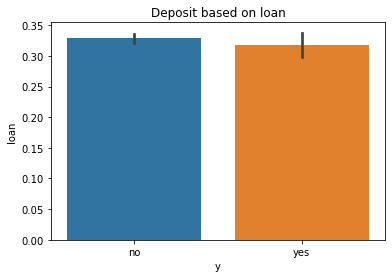

In [10]:
sns.barplot(x = 'y',y='loan', data = df)
plt.title("Deposit based on loan")

Text(0.5, 1.0, 'Deposit based on campaign')

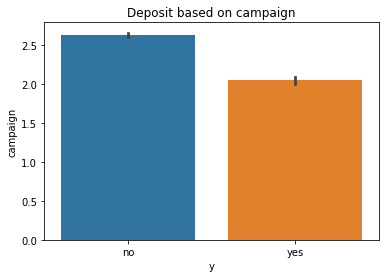

In [11]:
sns.barplot(x = 'y',y='campaign', data = df)
plt.title("Deposit based on campaign")

Based on the visualization above, the amount of customer that will subscribe and won't subscribe to the deposit term based on personal loan that they have is quite close. But the number difference when we use campaign as the indicator is quite huge. It also question the effectiveness of the campaign.

In [12]:
table = pd.crosstab(df.job, df.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed','subscribed']
table.sort_values(by=['subscribed'], ascending = False).loc[:,'subscribed']

job
student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: subscribed, dtype: float64

Based on the data above, most of customer that subscribe is student (31.43%). Hypothetically it also affects the effectiveness of the campaign.

# Models

In [14]:
#split independent and dependent variables

X = df.select_dtypes(['number'])
y = df["y"]

In [15]:
#Split training set and testing set

X = df.select_dtypes(['number'])
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("training set size:", X_train.shape)
print("test set size:", X_test.shape)

training set size: (30891, 11)
test set size: (10297, 11)


# Logistic Regression

In [16]:
models = LogisticRegression(solver="liblinear", random_state=11)

models.fit(X_train, y_train)
test_pred = models.predict(X_test)
train_pred = models.predict(X_train)

print("training set performance:")
print(classification_report(y_train, train_pred))

print("test set performance:")
print(classification_report(y_test, test_pred))

training set performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     27404
         yes       0.67      0.39      0.49      3487

    accuracy                           0.91     30891
   macro avg       0.80      0.68      0.72     30891
weighted avg       0.90      0.91      0.90     30891

test set performance:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9144
         yes       0.67      0.41      0.51      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [17]:
print("list of classes:", models.classes_)
print("weights:", models.coef_)
print("bias:", models.intercept_)

list of classes: ['no' 'yes']
weights: [[-0.00067007 -0.01236564  0.00447132 -0.06637856 -0.0018041  -0.22337144
  -0.28613578  0.39328279  0.04056455 -0.17580367 -0.00710034]]
bias: [0.00330286]


In [18]:
prediction = models.predict(X)
print("Target class:", y)
print("Prediction  :", prediction)

Target class: 0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object
Prediction  : ['no' 'no' 'no' ... 'no' 'yes' 'no']


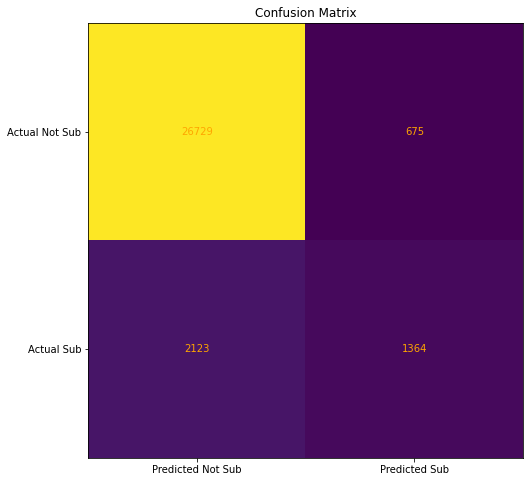

In [20]:
confusionmatrix = confusion_matrix(y_train, train_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusionmatrix)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Not Sub", "Predicted Sub"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()

In [26]:
print("accuracy:", models.score(X, y))

accuracy: 0.9098523841895698


Accuracy score dengan menggunakan Logistic Regression adalah sebesar 0.91

# K-Nearest Neighbors

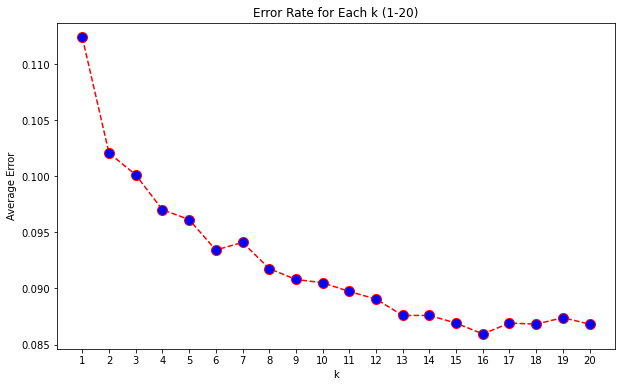

In [27]:
errors = []
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = np.mean(pred == y_test)
    error = np.mean(pred != y_test)
    accuracies.append(accuracy)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error Rate for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Error")
plt.show()

Error rate paling tinggi adalah K1 dengan nilai di atas 0.110

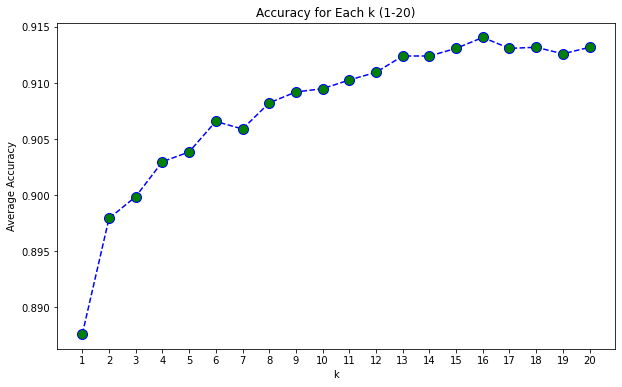

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, color="blue", linestyle="dashed", marker="o", markerfacecolor="green", markersize=10)
plt.title("Accuracy for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Accuracy")
plt.show()

Accuracy rate paling tinggi adalah k16 dengan nilai mencapai 0.915

In [29]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("Test Report:\n\n", classification_report(y_test, prediction))

Test Report:

               precision    recall  f1-score   support

          no       0.94      0.97      0.95      9144
         yes       0.66      0.47      0.55      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.72      0.75     10297
weighted avg       0.90      0.91      0.91     10297



# Support Vector Machine

In [32]:
models = svm.SVC(kernel='linear')
models.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
prediction = models.predict(X_test)
print("Train Report:\n\n", classification_report(y_train, models.predict(X_train)))
print("Test Report:\n\n", classification_report(y_test, prediction))

Train Report:

               precision    recall  f1-score   support

          no       0.92      0.98      0.95     27404
         yes       0.67      0.35      0.46      3487

    accuracy                           0.91     30891
   macro avg       0.80      0.66      0.71     30891
weighted avg       0.89      0.91      0.89     30891

Test Report:

               precision    recall  f1-score   support

          no       0.92      0.98      0.95      9144
         yes       0.68      0.37      0.48      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.67      0.71     10297
weighted avg       0.90      0.91      0.90     10297



In [39]:
svm_banks = SVC()
svm_banks.fit(X_train, y_train)

train_predictions = svm_banks.predict(X_train)
test_predictions = svm_banks.predict(X_test)

print("training accuracy:", classification_report(y_train, train_predictions))

print("test accuracy:", classification_report(y_test, test_predictions))


training accuracy:               precision    recall  f1-score   support

          no       0.91      0.99      0.94     27404
         yes       0.65      0.21      0.32      3487

    accuracy                           0.90     30891
   macro avg       0.78      0.60      0.63     30891
weighted avg       0.88      0.90      0.87     30891

test accuracy:               precision    recall  f1-score   support

          no       0.91      0.98      0.94      9144
         yes       0.61      0.22      0.32      1153

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



Accuracy score dengan menggunakan Support Vector Machine adalah sebesar 0.90

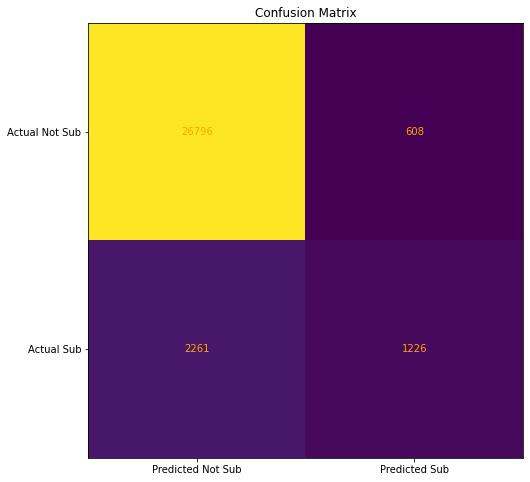

In [43]:
confusionmatrix = confusion_matrix(y_train, models.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusionmatrix)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Not Sub", "Predicted Sub"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusionmatrix[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()

# Decision tree

In [44]:
dtree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10)
dtree_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [47]:
train_predictions = dtree_clf.predict(X_train)
test_predictions = dtree_clf.predict(X_test)

print("training accuracy:", classification_report(y_train, train_predictions))


print("test accuracy:", classification_report(y_test, test_predictions))


training accuracy:               precision    recall  f1-score   support

          no       0.95      0.96      0.95     27404
         yes       0.63      0.58      0.61      3487

    accuracy                           0.91     30891
   macro avg       0.79      0.77      0.78     30891
weighted avg       0.91      0.91      0.91     30891

test accuracy:               precision    recall  f1-score   support

          no       0.95      0.96      0.95      9144
         yes       0.65      0.58      0.61      1153

    accuracy                           0.92     10297
   macro avg       0.80      0.77      0.78     10297
weighted avg       0.91      0.92      0.92     10297



In [49]:
confusionmatrix

array([[26796,   608],
       [ 2261,  1226]], dtype=int64)

In [77]:
dot_data = StringIO()
tree.export_graphviz(
    dtree_clf,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=list(X_train.columns),
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


InvocationException: GraphViz's executables not found

# Random Forest

In [81]:
randomforest_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
randomforest_clf.fit(X_train, y_train)

train_predictions = randomforest_clf.predict(X_train)
test_predictions = randomforest_clf.predict(X_test)

print("training accuracy:", classification_report(y_train, train_predictions))

print("test accuracy:", classification_report(y_test, test_predictions))


training accuracy:               precision    recall  f1-score   support

          no       0.91      0.99      0.95     27404
         yes       0.71      0.18      0.29      3487

    accuracy                           0.90     30891
   macro avg       0.81      0.59      0.62     30891
weighted avg       0.88      0.90      0.87     30891

test accuracy:               precision    recall  f1-score   support

          no       0.91      0.99      0.95      9144
         yes       0.68      0.19      0.29      1153

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



In [84]:
# contribution of each feature

feature_importances = pd.Series(randomforest_clf.feature_importances_, index=list(X_train.columns))
feature_importances

age               0.016190
loan              0.000000
duration          0.225035
campaign          0.000000
pdays             0.111432
previous          0.000000
emp.var.rate      0.047457
cons.price.idx    0.007362
cons.conf.idx     0.002758
euribor3m         0.180624
nr.employed       0.409141
dtype: float64

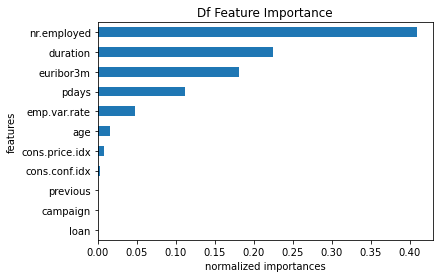

In [85]:
feature_importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Df Feature Importance")
plt.xlabel("normalized importances")
plt.ylabel("features")
plt.show()

Feature terbaik dari dataset ini adalah number of employees

In [88]:
randomforest_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
randomforest_clf.fit(X_train, y_train)

train_predictions = randomforest_clf.predict(X_train)
test_predictions = randomforest_clf.predict(X_test)

print("training accuracy:", classification_report(y_train, train_predictions))


print("test accuracy:", classification_report(y_test, test_predictions))


training accuracy:               precision    recall  f1-score   support

          no       0.90      1.00      0.95     27404
         yes       0.81      0.16      0.27      3487

    accuracy                           0.90     30891
   macro avg       0.86      0.58      0.61     30891
weighted avg       0.89      0.90      0.87     30891

test accuracy:               precision    recall  f1-score   support

          no       0.90      1.00      0.95      9144
         yes       0.83      0.16      0.26      1153

    accuracy                           0.90     10297
   macro avg       0.87      0.58      0.61     10297
weighted avg       0.90      0.90      0.87     10297



Accuracy score dengan menggunakan Random Forest adalah sebesar 0.90

# Naive Bayes

In [89]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

train_predictions = gauss_nb.predict(X_train)
test_predictions = gauss_nb.predict(X_test)

print("trainng accuracy:", classification_report(y_train, train_predictions))

print("test accuracy:", classification_report(y_test, test_predictions))


trainng accuracy:               precision    recall  f1-score   support

          no       0.94      0.90      0.92     27404
         yes       0.44      0.59      0.50      3487

    accuracy                           0.87     30891
   macro avg       0.69      0.74      0.71     30891
weighted avg       0.89      0.87      0.88     30891

test accuracy:               precision    recall  f1-score   support

          no       0.95      0.91      0.93      9144
         yes       0.45      0.60      0.51      1153

    accuracy                           0.87     10297
   macro avg       0.70      0.75      0.72     10297
weighted avg       0.89      0.87      0.88     10297



Accuracy score dengan menggunakan Random Forest adalah sebesar 0.87